In [26]:
#import Libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
# Reading prepared data into a dataframe.
df = pd.read_csv(r"E:\House LCC\Datasets\prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income
DATE,,,,,,,,,
2001-07-01,113.491,2001.0,7.0,49774.000000,143.4,4.6,1582.0,3.77,10370.7
2001-08-01,114.167,2001.0,8.0,49777.000000,143.3,4.9,1615.0,3.65,10543.1
2001-09-01,114.812,2001.0,9.0,49780.000000,143.0,5.0,1551.0,3.07,10452.8
2001-10-01,115.310,2001.0,10.0,49783.000000,142.3,5.3,1599.0,2.49,10267.7
2001-11-01,115.857,2001.0,11.0,49885.666667,142.1,5.5,1555.0,2.09,10279.7


We Don't need month and year column

In [17]:
#Dropping month and year
df.drop(columns=['Year','Month'], inplace=True)

In [18]:
df.shape

(266, 7)

In [19]:
df.corr()

,CSUSHPISA,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Income
CSUSHPISA,1.000000,0.920076,0.921820,-0.485206,0.172044,0.231224,0.830845
Per_Capita_GDP,0.920076,1.000000,0.932130,-0.438029,-0.097428,0.016379,0.944180
CPI,0.921820,0.932130,1.000000,-0.289662,-0.175635,-0.053135,0.882548
UNRATE,-0.485206,-0.438029,-0.289662,1.000000,-0.558751,-0.546800,-0.208165
Cons_Materials,0.172044,-0.097428,-0.175635,-0.558751,1.000000,0.663831,-0.221803
FEDFUNDS,0.231224,0.016379,-0.053135,-0.546800,0.663831,1.000000,-0.166017
Income,0.830845,0.944180,0.882548,-0.208165,-0.221803,-0.166017,1.000000


In [20]:
#Spliting target values and independent values
y=df.pop('CSUSHPISA')
x=df

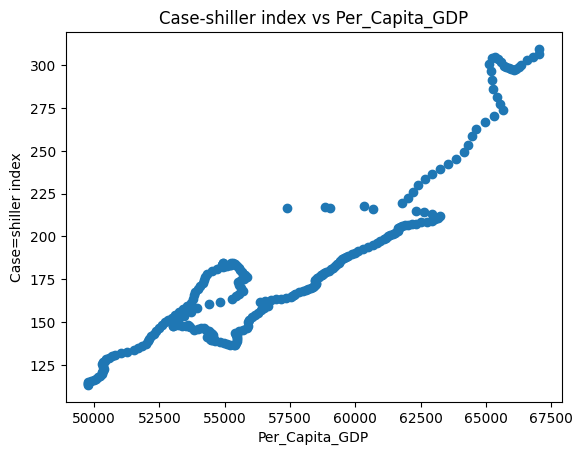

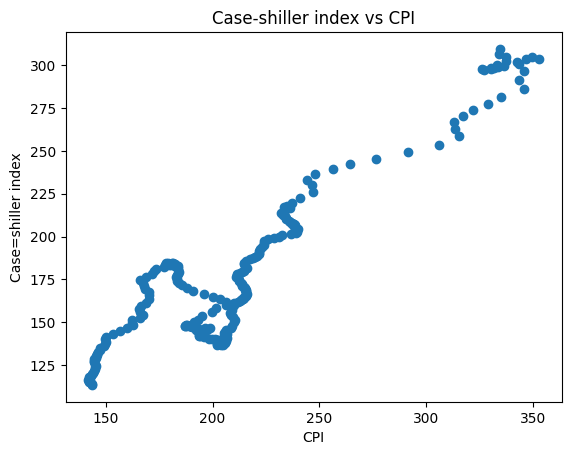

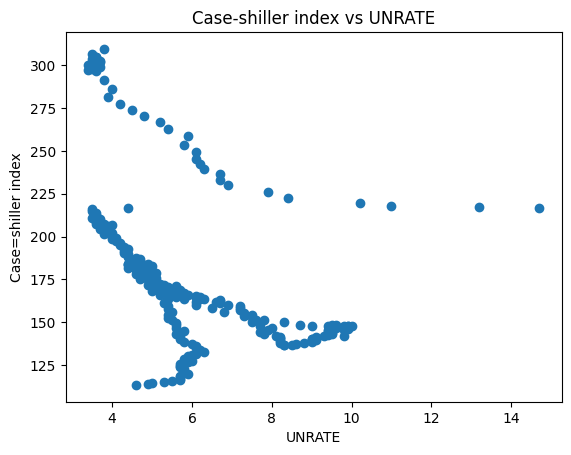

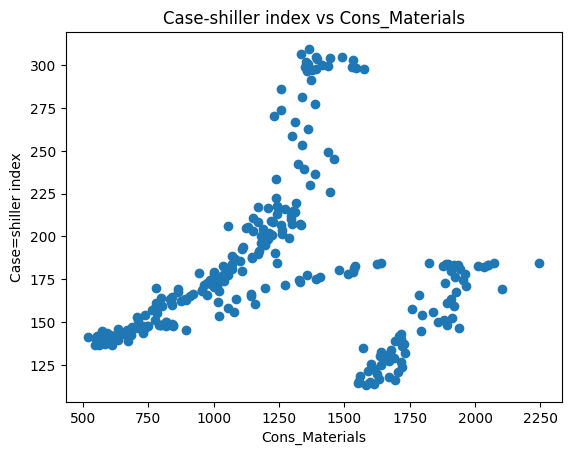

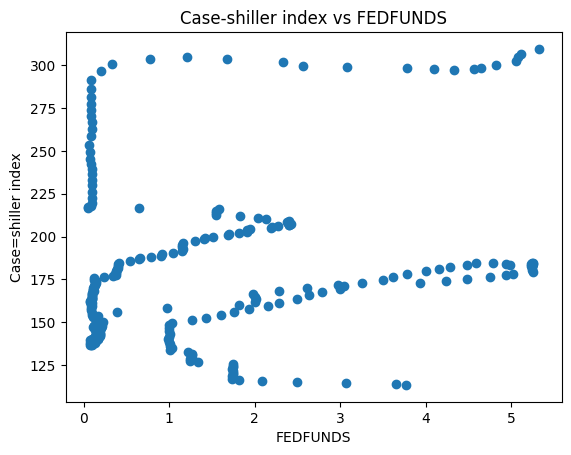

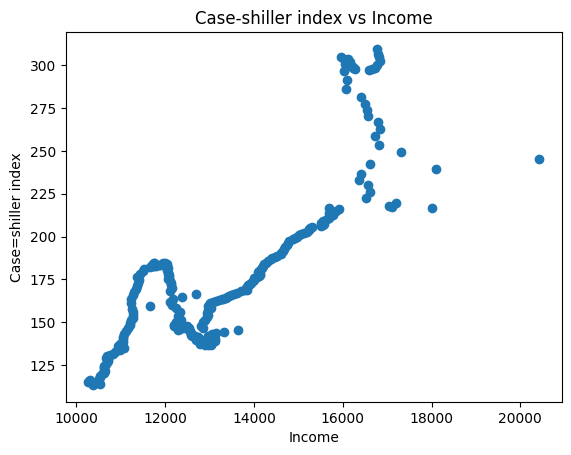

In [21]:
#Plotting scatter plots of case-shiller index vs features

for feature in x.columns:
    plt.figure()
    plt.scatter(x=x[feature],y=y)
    plt.xlabel(feature)
    plt.ylabel("Case=shiller index")
    plt.title(f'Case-shiller index vs {feature}')

From the correlation matrix and the scatter plots, the following conclusions can be made-
- Impact of the great recession is reflected in almost all the plots.
- Interest rates have a slight negative impact on the home prices.
- All the other variables are positively correlated with the home prices.

From the correlation matrix above, it can be seen that several pairs of independent variables have high correlation. Let's drop one column from each such pair as they will cause multicollinearity. We will drop the column which has lower correlation with the target.

In [ ]:
# Dropping multicollinearity columns
mult_cols = [ "CPI", "Income"]
df.drop(columns = mult_cols, inplace = True)
x = df

Model Building

In [23]:
# Scaling
scalar = MinMaxScaler()
x = scalar.fit_transform(X)
x

array([[0.00000000e+00, 1.06194690e-01, 6.15652174e-01, 7.04545455e-01],
       [1.73761946e-04, 1.32743363e-01, 6.34782609e-01, 6.81818182e-01],
       [3.47523892e-04, 1.41592920e-01, 5.97681159e-01, 5.71969697e-01],
       ...,
       [9.86523796e-01, 1.76991150e-02, 5.63478261e-01, 9.52651515e-01],
       [1.00000000e+00, 8.84955752e-03, 4.71884058e-01, 9.60227273e-01],
       [1.00000000e+00, 3.53982301e-02, 4.88695652e-01, 1.00000000e+00]])

In [24]:
#spliting data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state= 42)

In [27]:
#Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
pred=model.predict(x_test)
score=r2_score(pred,y_test)
print("The r2_score for the validation set is: ", score)


The r2_score for the validation set is:  0.9423050924412216


The r2_score is close to 1. It means that the model predicts the target variable with good accuracy.

In [29]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 187.99871462250948
The coefficient for UNRATE is 52.80761924895482
The coefficient for Cons_Materials is 57.17271362944115
The coefficient for FEDFUNDS is 19.603470661263756


**The coefficients of the variables are not in sync with their correlation coefficients with the target variable. For example, the coefficient of "UNRATE" (unemployment rate) is positive. It does not make sense as a rise in unemployment will surely lead to a decrease in the home prices. So, the question arises, why did this happen?**

I found the answer on [https://www.researchgate.net/post/What-does-it-indicating-If-there-is-positive-correlation-but-negative-regression-coefficient] .

"... reason is what some call "real suppression". In this case suppression occurs because an important predictor variable, necessary in understanding the true relationship between the latent variables, suppresses the effect of another predictor variable."

As most variable increase with time. So, it is expected that they will have high correlation. So, instead of depending upon the linear model, we can directly study the impact of variables on the home price index using the scatter plots.